In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
df= pd.read_csv("imdb_labelled.txt", delimiter = '\t', header=None)
#df.columns = ['comments', 'rating']
#df=df.rename(index=str, columns = {'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0':'comments', 'Unnamed: 1':'feed_back'})
df.head()


,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
df=df.rename(columns={0:'comments',1:'feed_back'})
df.head()

,comments,feed_back
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: feed_back, dtype: bool

In [5]:
words = ['bad','sucked', 'lacked', 'bored','boring','terrible','tired','waste','predictable','embarassing', 'insult','Attempting']
for w in words:
    df[str(w)]= df['comments'].str.contains(' ' + str(w)+' ', case=False)
 

In [6]:
df['allcaps'] = df.comments.str.isupper()

In [7]:
df['feed_back'] = (df['feed_back'] == 0 )
df.head()

,comments,feed_back,bad,sucked,lacked,bored,boring,terrible,tired,waste,predictable,embarassing,insult,Attempting,allcaps
0,"A very, very, very slow-moving, aimless movie ...",True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False


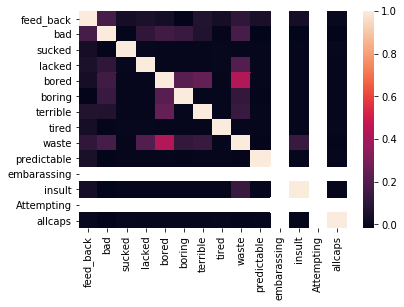

In [8]:
sns.heatmap(df.corr())

In [12]:
data = df[words + ['allcaps']]
target = df['feed_back']
data.head()

,bad,sucked,lacked,bored,boring,terrible,tired,waste,predictable,embarassing,insult,Attempting,allcaps
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
comments = df['comments']
comments.head()

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
Name: comments, dtype: object

In [32]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print (data.shape[0],( target != y_pred).sum())

748 317


In [31]:
ac = data.shape[0]
acc= (target != y_pred).sum()
accuracy = acc/ac*100
accuracy 

42.37967914438502

In [33]:
confusion_matrix(target,y_pred)

array([[379,   7],
       [310,  52]])

In [34]:
df['feed_back'].value_counts()

False    386
True     362
Name: feed_back, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target,test_size = .25, random_state=10)
print(bnb.fit(x_train,y_train).score(x_test,y_test))
print(bnb.fit(data, target).score(data, target))
#print(accuracy_score(y_test,y_pred))

0.5882352941176471
0.5762032085561497


In [47]:
cross_val_score(bnb,data,target, cv=4)

array([0.54255319, 0.59574468, 0.56989247, 0.58064516])

Classifier 2

In [48]:
df2=df

In [50]:
words2 = ['bad','not', 'lacked', 'bored','boring','terrible','no','off','predictable','embarassing','over', 'insult','Attempting']
for w in words2:
    df2[str(w)]= df2['comments'].str.contains(' ' + str(w)+' ', case=False)
df2['feed_back'] = (df['feed_back'] == 0 )
df2.head(3)

,comments,feed_back,bad,sucked,lacked,bored,boring,terrible,tired,waste,predictable,embarassing,insult,Attempting,allcaps,not,no,off,over
0,"A very, very, very slow-moving, aimless movie ...",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


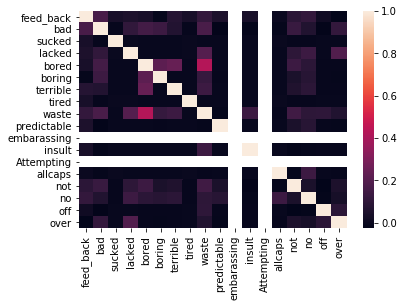

In [51]:
sns.heatmap(df2.corr())

In [54]:
data2 = df2[words + ['allcaps']]
target2 = df2['feed_back']
data2.head(3)

,bad,sucked,lacked,bored,boring,terrible,tired,waste,predictable,embarassing,insult,Attempting,allcaps
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
comments2 = df2['comments']
bnb.fit(data2, target2)
y_pred2 = bnb.predict(data2)
ac2 = data2.shape[0]
acc= (target2 != y_pred2).sum()
accuracy = acc/ac*100
accuracy 

42.37967914438502